## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [37]:
# Importing the necessary libraries to be used in the analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Preparation
Load the dataset to be used in the analysis

In [3]:
#Importing the data set
housing_data = pd.read_csv("data/kc_house_data.csv") 

In [4]:
# Previewing the datset
housing_data.head()

id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900         3       1.00         1180      5650   
1  6414100192  12/09/2014  538000         3       2.25         2570      7242   
2  5631500400   2/25/2015  180000         2       1.00          770     10000   
3  2487200875  12/09/2014  604000         4       3.00         1960      5000   
4  1954400510   2/18/2015  510000         3       2.00         1680      8080   

   floors waterfront  view  ...          grade sqft_above  sqft_basement  \
0     1.0        NaN  NONE  ...      7 Average       1180              0   
1     2.0         NO  NONE  ...      7 Average       2170            400   
2     1.0         NO  NONE  ...  6 Low Average        770              0   
3     1.0         NO  NONE  ...      7 Average       1050            910   
4     1.0         NO  NONE  ...         8 Good       1680              0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
housing_data.tail()

id        date   price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000         3       2.50         1530   
21593  6600060120   2/23/2015  400000         4       2.50         2310   
21594  1523300141   6/23/2014  402101         2       0.75         1020   
21595   291310100   1/16/2015  400000         3       2.50         1600   
21596  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
21592      1131     3.0         NO  NONE  ...     8 Good       1530   
21593      5813     2.0         NO  NONE  ...     8 Good       2310   
21594      1350     2.0         NO  NONE  ...  7 Average       1020   
21595      2388     2.0        NaN  NONE  ...     8 Good       1600   
21596      1076     2.0         NO  NONE  ...  7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592              0     2009           0.0    98103  47.6993 -122.346   
21593              0     2014           0.0    98146  47.5107 -122.362   
21594              0     2009           0.0    98144  47.5944 -122.299   
21595              0     2004           0.0    98027  47.5345 -122.069   
21596              0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

## Data Understanding
This involves exploring the dataset's characteristics, structure, and key attributes. This involves an exploration of the dataset's properties, structure, and crucial characteristics. The key steps include investigating:

The overview of the data and its data types

In [6]:
#Check the data summary to understand the data i.e. non-null values, data types
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Shape of the data

In [7]:
# check no.or rows and columns
housing_data.shape

(21597, 21)

The dataset's shape is (21597, 21), this means that the data has 21 columns and 21597 rows.

Column names

In [8]:
# check columns names
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Column Names in the dataset and their descriptions

id - Unique identifier for a house

date - Date house was sold

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

view - Quality of view from house

condition - How good the overall condition of the house is.

grade - Overall grade of the house.

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Summary statistics of the data

In [9]:
# summary of the data
housing_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Existence of missing data

In [10]:
#Check for missing values
# Count of missing values
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The following variables have missing values: waterfront has 2376 missing values, View has missing values, while the year the houses were renovated has 3842 missing values.

Existence of duplicate entries

In [11]:
# Checking for existence of duplicate entries
housing_data.duplicated().sum()

0

This means that there are no duplicates in the dataset

## Data Cleaning
Handling missing values

In [15]:
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Checking the percentage of missing value

In [16]:
housing_data.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

The waterfront data as well as the year the houses were renovated exhibit the most significant levels of missing data in the dataset, accounting for approximately 11% and 18%, respectively. Additionally the view column contains a relatively minor amount of missing information, comprising of only 0.3% of the dataset's missing values.

Dealing with missing values
We will first deal with the missing values in the waterfront, view and yr_renovated columns

In [17]:
#checking unique values in the waterfront column
housing_data['waterfront'].unique()

#checking the value counts
housing_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [18]:
#checking for unique values in the view column
housing_data['view'].unique()
#checking value counts
housing_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [30]:
housing_data.dropna(subset = ['view', 'waterfront'], inplace = True)

In [31]:
#checking the unique values for the year renovated column
housing_data['yr_renovated'].unique()
housing_data['yr_renovated'].value_counts()

0.0       18513
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1967.0        1
1934.0        1
1944.0        1
1950.0        1
1974.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
#filling year renovated column with zeros for where no renovation has been done
housing_data['yr_renovated'] = housing_data['yr_renovated'].fillna(0)

#checking unique values after replacing missing values
housing_data['yr_renovated'].unique()

array([1991.,    0., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988., 1977.,
       1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004., 1986.,
       2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012., 1968.,
       1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982., 1956.,
       1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959., 1960.,
       1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [34]:
# Verify that the missing values have been handled
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Exploring and Visualising our Data

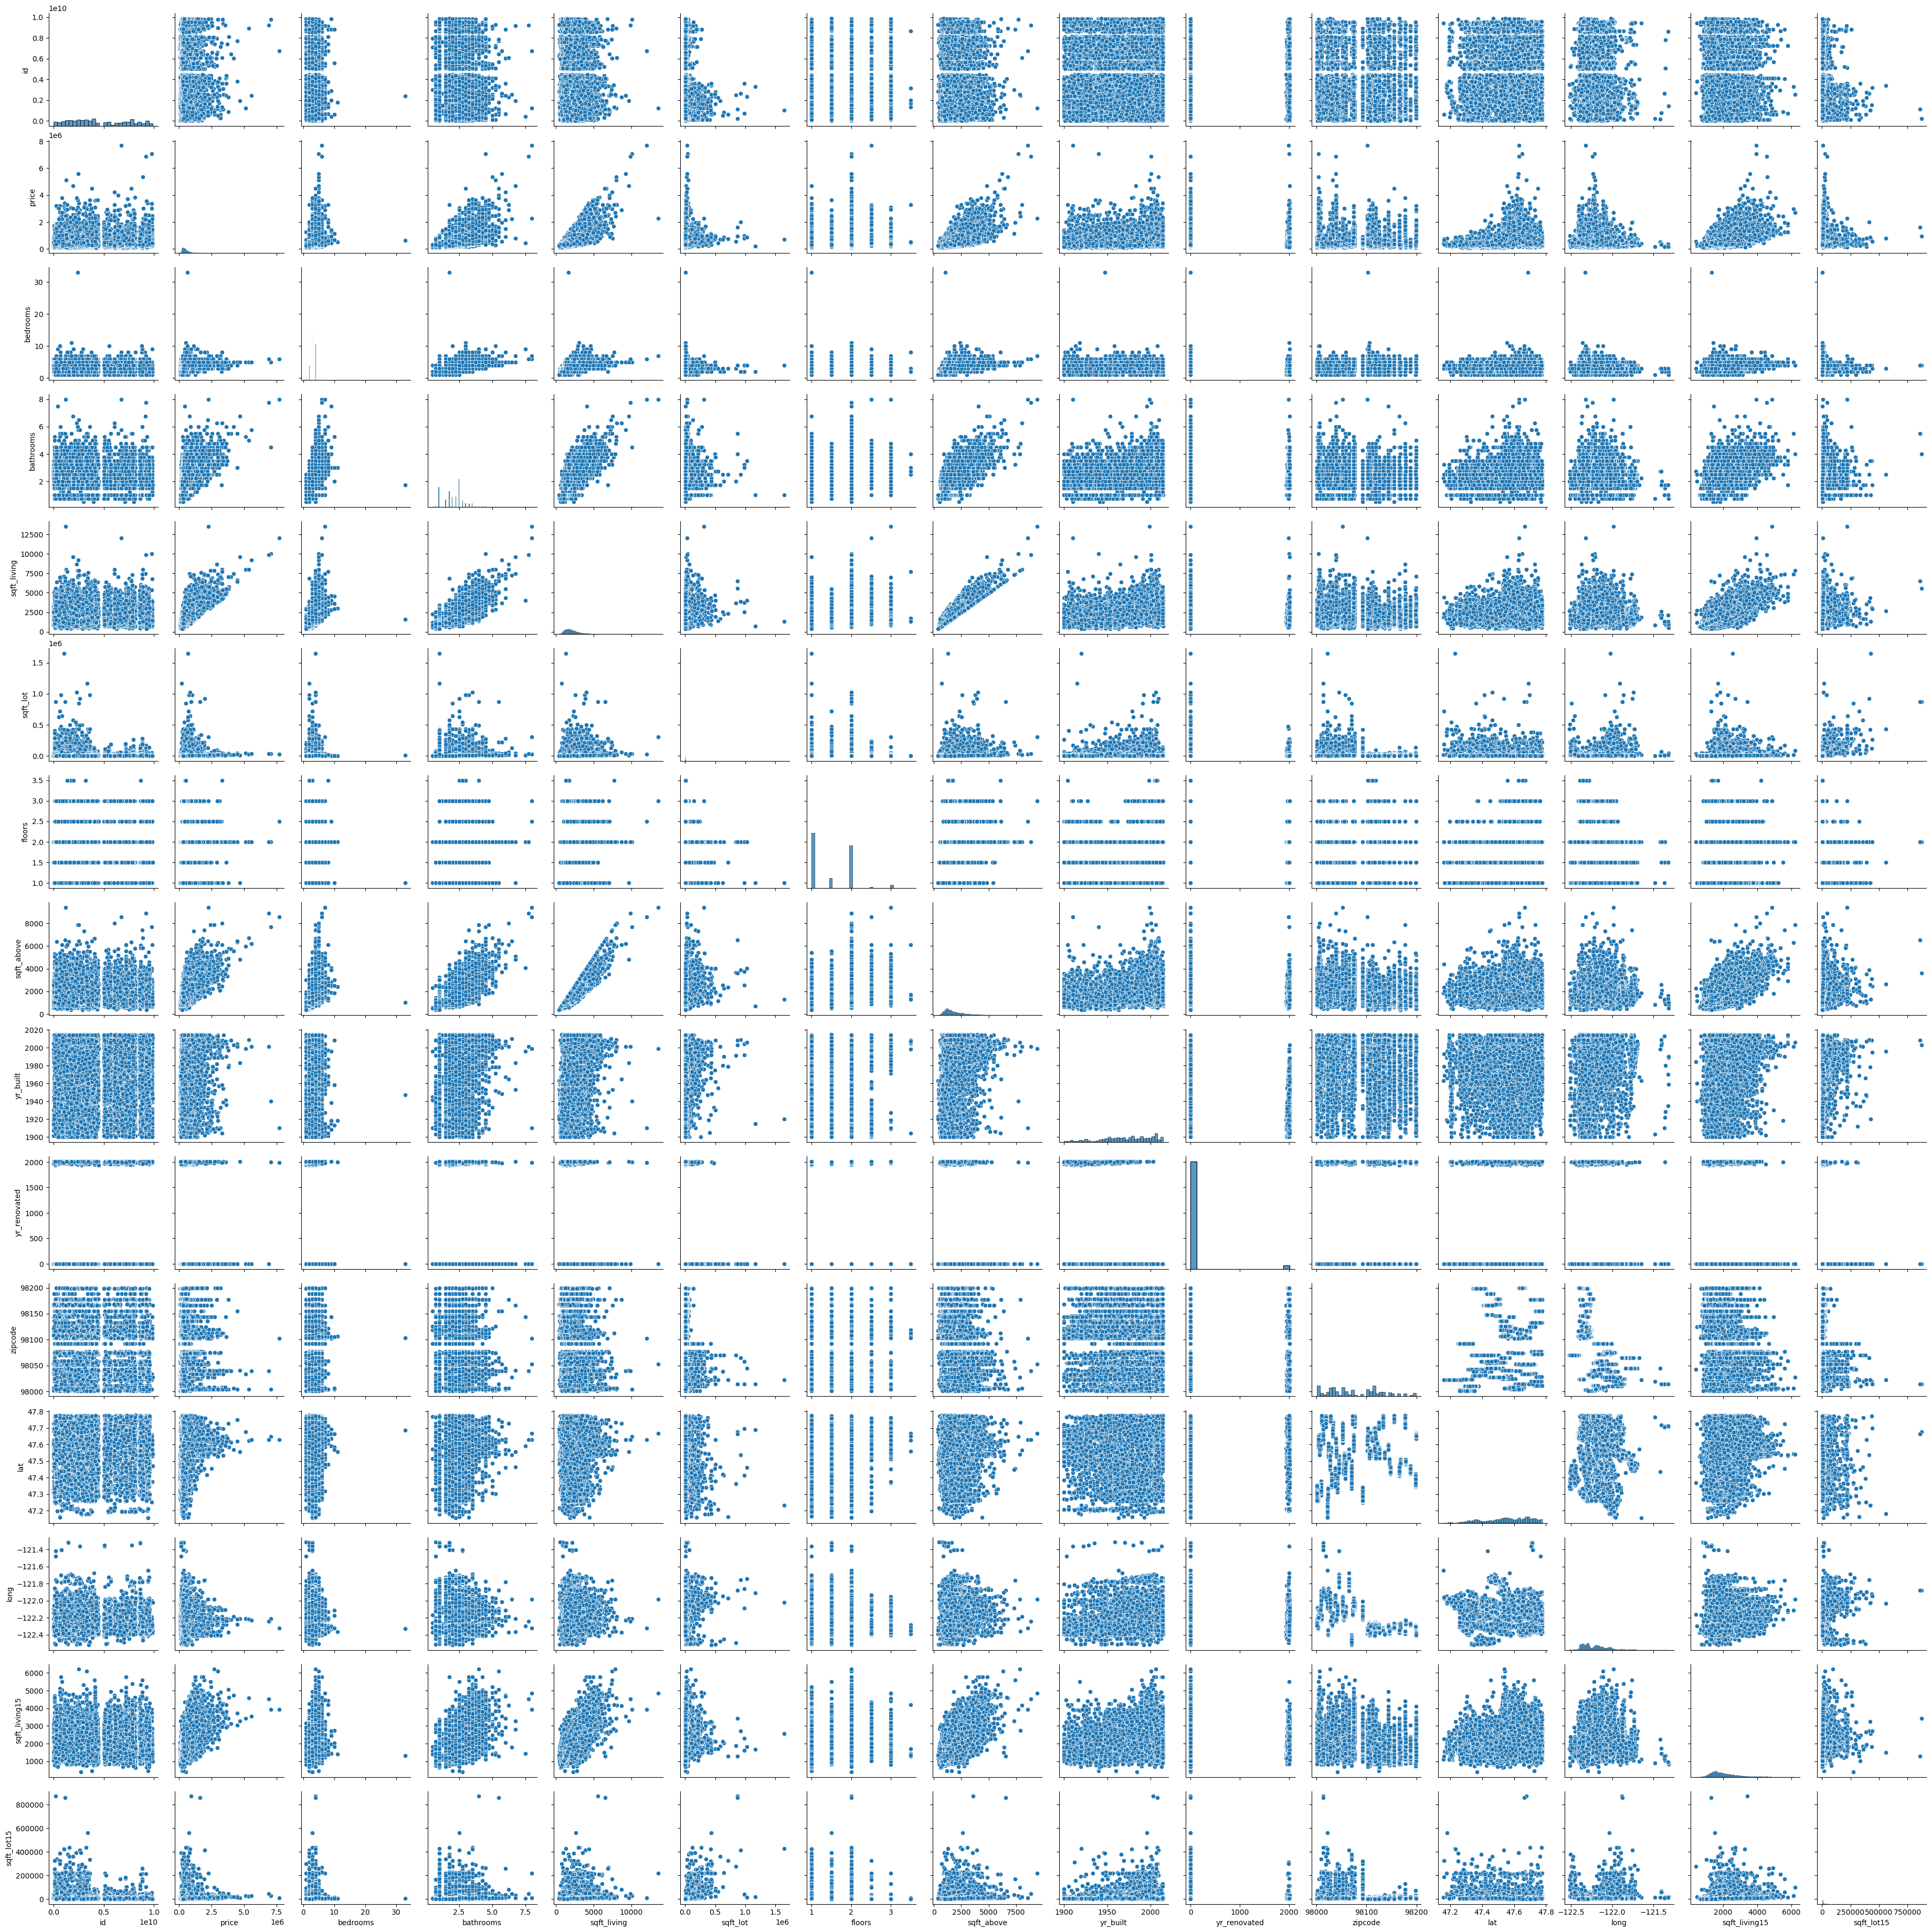

In [39]:
#sns.pairplot(data=housing_data, palette='Dark2_r')
